# **Методи за растеризиране на отсечка**
#### **Домашна работа №1**
#### **Вариант №1**

## **Метод на Брезенхам**

- Алгоритъмът на Брезенхам е класически метод за изчертаване на линии на пикселна мрежа. Основната идея е:
    - Искаме да нарисуваме линия между две точки $(x_0, y_0)$ и $(x_1, y_1)$;
    - На компютъра имаме само цели числа, т.е. пиксели;
    - Алгоритъмът избира кои пиксели да се включат, така че линията да е възможно най-близка до идеалната права линия, без да се използват сложни изчисления с плаваща запетая;
    - Работи итеративно - решава стъпка по стъпка дали да се премести в съседен ред или колона, базирано на "грешка", която измерва колко линията се отклонява от идеалната.

Въведи x0:  0
Въведи y0:  1
Въведи x1:  6
Въведи y1:  4


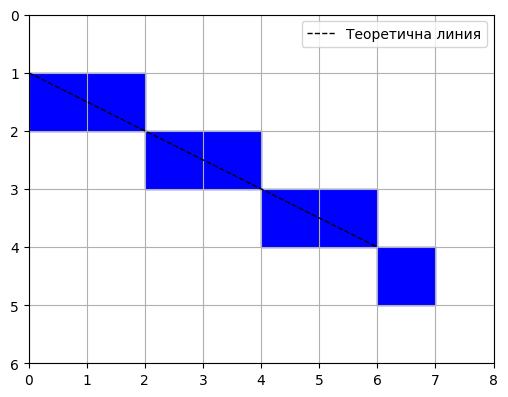

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0) # абсолютната разлика по координатите x и y
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = 1 if x0 < x1 else -1 # посоката на движение по x и y т.е. 1 за увеличаване, -1 за намаляване
    sy = 1 if y0 < y1 else -1

    max_points = dx + dy + 1
    points_array = np.zeros((max_points, 2), dtype=int)
    index = 0
 
    if dx > dy: # ако движението е по x повече, x се увеличава всеки път, а y се променя според натрупаната грешка
        err = dx / 2
        while x != x1:
            points_array[index] = (x, y)
            index += 1
            err -= dy # err се намалява с dy и ако стане отрицателна, y се коригира и грешката се увеличава с dx
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2 # обратно, движението е по y, а x се коригира според грешката
        while y != y1:
            points_array[index] = (x, y)
            index += 1
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy

    points_array[index] = (x1, y1)
    index += 1

    return points_array[:index]

x0 = int(input("Въведи x0: "))
y0 = int(input("Въведи y0: "))
x1 = int(input("Въведи x1: "))
y1 = int(input("Въведи y1: "))

bres_points = bresenham_line(x0, y0, x1, y1)

screen_width = max(x0, x1) + 2
screen_height = max(y0, y1) + 2

plt.figure(figsize=(6,6))

def draw_squares(points, color): # за всяка точка добавя квадрат с размер 1x1, който представлява пиксел от линията
    for x, y in points:
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color))

draw_squares(bres_points, 'blue')

plt.plot([x0, x1], [y0, y1], color='black', linestyle='--', linewidth=1, label='Теоретична линия')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

Въведи брой на отсечките (n):  2



Отсечка 1:


Въведи x0:  0
Въведи y0:  1
Въведи x1:  6
Въведи y1:  4



Отсечка 2:


Въведи x0:  1
Въведи y0:  2
Въведи x1:  7
Въведи y1:  8


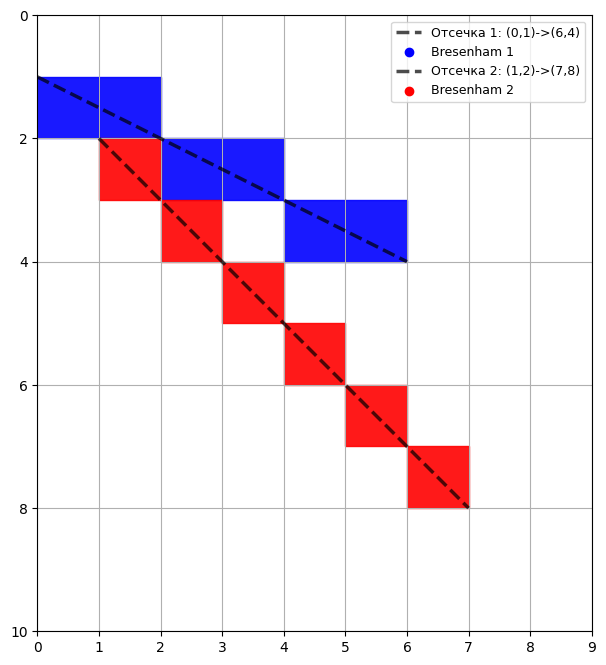

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1

    max_points = dx + dy + 1
    points_array = np.zeros((max_points, 2), dtype=int)
    index = 0

    if dx > dy:
        err = dx / 2
        while x != x1:
            points_array[index] = (x, y)
            index += 1
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2
        while y != y1:
            points_array[index] = (x, y)
            index += 1
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy

    points_array[index] = (x1, y1)
    return points_array[:index]


def draw_squares(points, color):
    for x, y in points:
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color, alpha=0.9))

n = int(input("Въведи брой на отсечките (n): "))

all_points = []
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown']

max_x, max_y = 0, 0

for i in range(n):
    print(f"\nОтсечка {i+1}:")
    x0 = int(input("Въведи x0: "))
    y0 = int(input("Въведи y0: "))
    x1 = int(input("Въведи x1: "))
    y1 = int(input("Въведи y1: "))

    bres_points = bresenham_line(x0, y0, x1, y1)
    color = colors[i % len(colors)]
    all_points.append((bres_points, x0, y0, x1, y1, color))

    max_x = max(max_x, x0, x1)
    max_y = max(max_y, y0, y1)

plt.figure(figsize=(8, 8))

for idx, (points, x0, y0, x1, y1, color) in enumerate(all_points, start=1):
    draw_squares(points, color)

    plt.plot([x0, x1], [y0, y1],
             color='black', linestyle='--', linewidth=2.5, alpha=0.7,
             label=f'Отсечка {idx}: ({x0},{y0})->({x1},{y1})')

    plt.scatter([], [], color=color, label=f'Bresenham {idx}')

plt.xlim(0, max_x + 2)
plt.ylim(0, max_y + 2)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(loc='upper right', fontsize=9)
plt.show()

## **Метод със закръгляне**

- Алгоритъм за рисуване на линия върху пикселна решетка, подобно на Брезенхем, но с малко по-различен подход. Основната идея е:
    - Разделяме линията между две точки на еднакви стъпки, в зависимост от по-голямата промяна по $x$ или $y$.
    - За всяка стъпка добавяме малко прираст по $x$ и $y$, за да преминем към следващия пиксел.
    - Закръгляме координатите, за да изберем най-близкия пиксел в решетката.

Въведи x0:  0
Въведи y0:  1
Въведи x1:  6
Въведи y1:  4


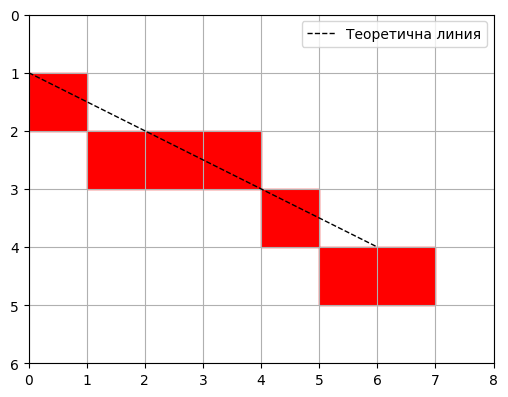

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def dda_line(x0, y0, x1, y1):
    dx = x1 - x0 # разликите по x и y
    dy = y1 - y0 
    steps = int(max(abs(dx), abs(dy))) # броят стъпки
    x_inc = dx / steps # колко да се премести координатата на всяка стъпка
    y_inc = dy / steps
    x, y = x0, y0

    points_array = np.zeros((steps + 1, 2), dtype=int)

    for i in range(steps + 1): # добавя текущите координати (x,y) към масива след закръгляне до цяло число
        points_array[i] = (int(round(x)), int(round(y)))
        x += x_inc # премества x и y с прираста x_inc и y_inc
        y += y_inc

    return points_array

x0 = int(input("Въведи x0: "))
y0 = int(input("Въведи y0: "))
x1 = int(input("Въведи x1: "))
y1 = int(input("Въведи y1: "))

dda_points = dda_line(x0, y0, x1, y1)

screen_width = max(x0, x1) + 2
screen_height = max(y0, y1) + 2

plt.figure(figsize=(6,6))

def draw_squares(points, color):
    for x, y in points:
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color))

draw_squares(dda_points, 'red')

plt.plot([x0, x1], [y0, y1], color='black', linestyle='--', linewidth=1, label='Теоретична линия')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

Въведи брой на отсечките (n):  2



Отсечка 1:


Въведи x0:  0
Въведи y0:  1
Въведи x1:  6
Въведи y1:  4



Отсечка 2:


Въведи x0:  1
Въведи y0:  2
Въведи x1:  7
Въведи y1:  8


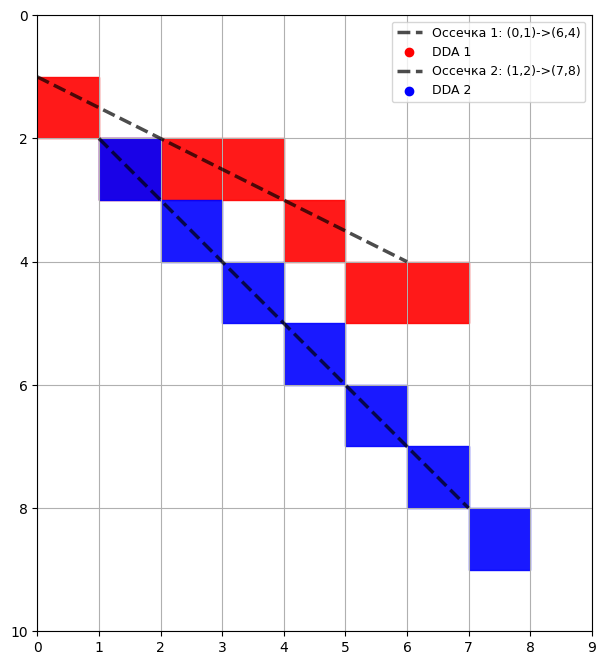

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def dda_line(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = int(max(abs(dx), abs(dy)))  # брой стъпки
    x_inc = dx / steps
    y_inc = dy / steps
    x, y = x0, y0

    points_array = np.zeros((steps + 1, 2), dtype=int)

    for i in range(steps + 1):
        points_array[i] = (int(round(x)), int(round(y)))
        x += x_inc
        y += y_inc

    return points_array


def draw_squares(points, color):
    for x, y in points:
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color, alpha=0.9))

n = int(input("Въведи брой на отсечките (n): "))

all_points = []
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown']

max_x, max_y = 0, 0

for i in range(n):
    print(f"\nОтсечка {i+1}:")
    x0 = int(input("Въведи x0: "))
    y0 = int(input("Въведи y0: "))
    x1 = int(input("Въведи x1: "))
    y1 = int(input("Въведи y1: "))

    dda_points = dda_line(x0, y0, x1, y1)
    color = colors[i % len(colors)]
    all_points.append((dda_points, x0, y0, x1, y1, color))

    max_x = max(max_x, x0, x1)
    max_y = max(max_y, y0, y1)

plt.figure(figsize=(8, 8))

for idx, (points, x0, y0, x1, y1, color) in enumerate(all_points, start=1):
    draw_squares(points, color)

    plt.plot([x0, x1], [y0, y1],
             color='black', linestyle='--', linewidth=2.5, alpha=0.7,
             label=f'Оссечка {idx}: ({x0},{y0})->({x1},{y1})')

    plt.scatter([], [], color=color, label=f'DDA {idx}')

plt.xlim(0, max_x + 2)
plt.ylim(0, max_y + 2)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(loc='upper right', fontsize=9)
plt.show()

## a) **Сравнение на двата метода**

Въведи x0:  0
Въведи y0:  1
Въведи x1:  6
Въведи y1:  4


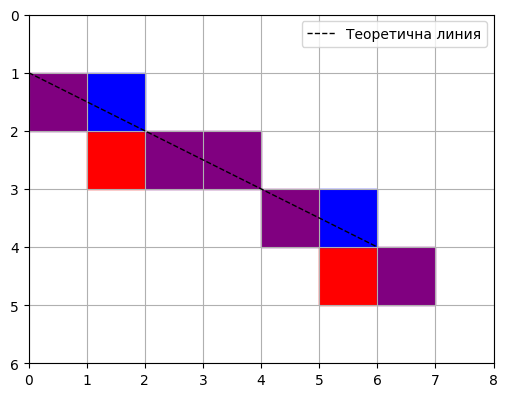

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def dda_line(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = int(max(abs(dx), abs(dy)))
    x_inc = dx / steps
    y_inc = dy / steps
    x, y = x0, y0

    points_array = np.zeros((steps + 1, 2), dtype=int)

    for i in range(steps + 1):
        points_array[i] = (int(round(x)), int(round(y)))
        x += x_inc
        y += y_inc

    return points_array

def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1

    max_points = dx + dy + 1
    points_array = np.zeros((max_points, 2), dtype=int)
    index = 0

    if dx > dy:
        err = dx / 2
        while x != x1:
            points_array[index] = (x, y)
            index += 1
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2
        while y != y1:
            points_array[index] = (x, y)
            index += 1
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy

    points_array[index] = (x1, y1)
    index += 1

    return points_array[:index]

x0 = int(input("Въведи x0: "))
y0 = int(input("Въведи y0: "))
x1 = int(input("Въведи x1: "))
y1 = int(input("Въведи y1: "))

dda_points = set(map(tuple, dda_line(x0, y0, x1, y1)))
bres_points = set(map(tuple, bresenham_line(x0, y0, x1, y1)))

common = dda_points & bres_points
only_dda = dda_points - common
only_bres = bres_points - common

screen_width = max(x0, x1) + 2
screen_height = max(y0, y1) + 2

plt.figure(figsize=(6,6))

def draw_squares(points, color):
    for x, y in points:
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color))

draw_squares(only_dda, 'red')
draw_squares(only_bres, 'blue')
draw_squares(common, 'purple')

plt.plot([x0, x1], [y0, y1], color='black', linestyle='--', linewidth=1, label='Теоретична линия')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

Макар и двата метода да постигат еднаква цел, начинът на изчисление и производителността им се различават.
- Основна идея:
    - Метод със закръгляне: Линията се разделя на равни стъпки, като за всяка стъпка се прибавя дробен прираст по $x$ и $y$, а координатите се закръгляват до най-близкото цяло число.
    - Метод на Брезенхам: Линията се изгражда чрез изчисляване на дискретна грешка и избор на следващия пиксел на базата на цели числа, без използване на дробни стойности.
- Изчисления:
    - Метод със закръгляне: Използва деление и операции с плаваща запетая. По-бавен при голям брой пиксели.
    - Метод на Брезенхам: Използва само цели числа и натрупва грешка. По-бърз и по-подходящ за хардуерна реализация.
- Точност и визуален ефект:
    - Метод със закръгляне: Може да има малки грешки заради закръгляването, особено при диагонални линии.
    - Метод на Брезенхам: По-точен за дискретни пикселни линии, защото използва алгоритъм за минимизиране на грешката.
- В крайна сметка:
    - Метод със закръгляне е подходящ за приложения, където точността на плаващата запетая е достатъчна и кодът трябва да е прост.
    - Метод на Брезенхам е предпочитан при хардуерни реализации и графични системи, където се изисква бързо и точно рисуване на линии с дискретни пиксели.

## б) **За колко време се пресмятат растерните образи на 100 000 случайни отсечки (без да се изчертават) в екран 1400х100 пиксела?**

Време за Метод за закръгляне на 100 000 отсечки: 114.62 секунди
Време за Метод на Брезенхам на 100 000 отсечки: 31.22 секунди


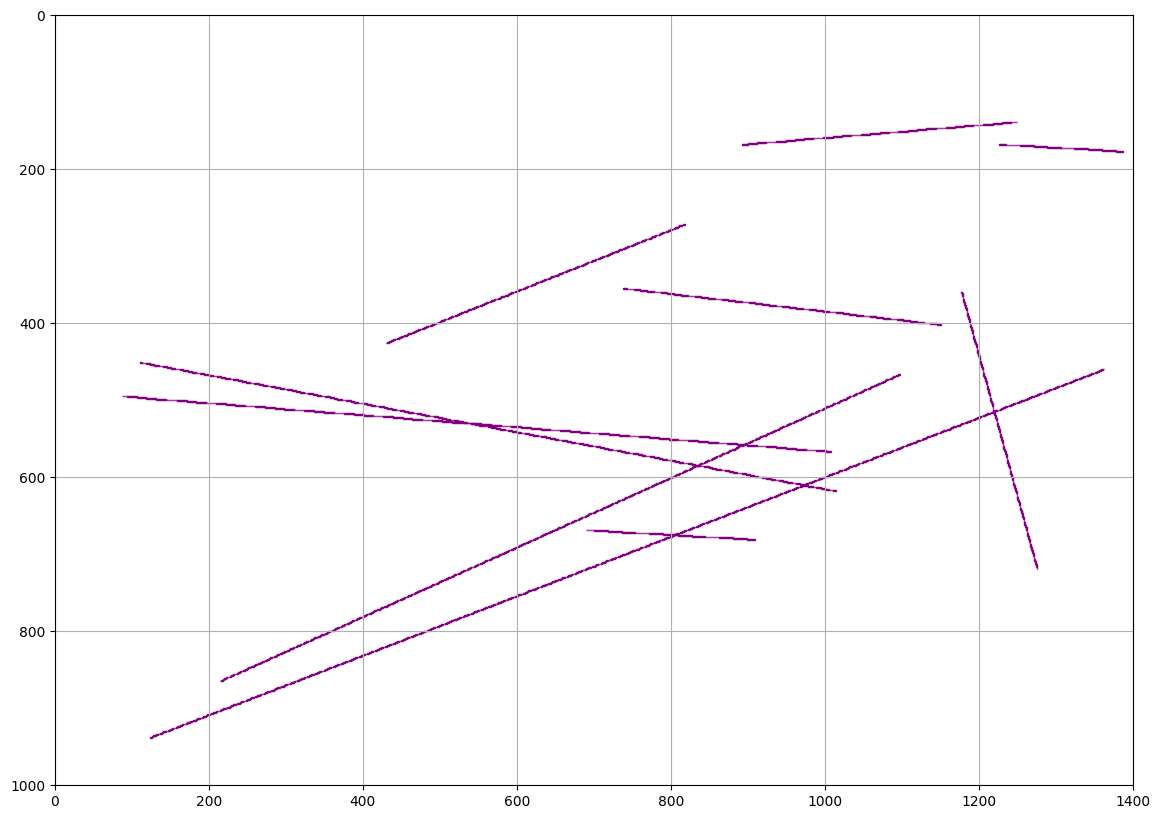

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import time

def dda_line(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = int(max(abs(dx), abs(dy)))
    x_inc = dx / steps
    y_inc = dy / steps
    x, y = x0, y0

    points_array = np.zeros((steps + 1, 2), dtype=int)
    for i in range(steps + 1):
        points_array[i] = (int(round(x)), int(round(y)))
        x += x_inc
        y += y_inc
    return points_array

def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1

    max_points = dx + dy + 1
    points_array = np.zeros((max_points, 2), dtype=int)
    index = 0

    if dx > dy:
        err = dx / 2
        while x != x1:
            points_array[index] = (x, y)
            index += 1
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2
        while y != y1:
            points_array[index] = (x, y)
            index += 1
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy

    points_array[index] = (x1, y1)
    index += 1
    return points_array[:index]

screen_width, screen_height = 1400, 1000

num_lines = 100_000
x0s = np.random.randint(0, screen_width, num_lines)
y0s = np.random.randint(0, screen_height, num_lines)
x1s = np.random.randint(0, screen_width, num_lines)
y1s = np.random.randint(0, screen_height, num_lines)

start_dda = time.time()
for i in range(num_lines):
    dda_line(x0s[i], y0s[i], x1s[i], y1s[i])
end_dda = time.time()
print(f"Време за Метод за закръгляне на 100 000 отсечки: {end_dda - start_dda:.2f} секунди")

start_bres = time.time()
for i in range(num_lines):
    bresenham_line(x0s[i], y0s[i], x1s[i], y1s[i])
end_bres = time.time()
print(f"Време за Метод на Брезенхам на 100 000 отсечки: {end_bres - start_bres:.2f} секунди")

plt.figure(figsize=(14,10))
for i in range(10):
    dda_points = set(map(tuple, dda_line(x0s[i], y0s[i], x1s[i], y1s[i])))
    bres_points = set(map(tuple, bresenham_line(x0s[i], y0s[i], x1s[i], y1s[i])))
    common = dda_points & bres_points
    only_dda = dda_points - common
    only_bres = bres_points - common

    def draw_squares(points, color):
        for x, y in points:
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, color=color))
    draw_squares(only_dda, 'red')
    draw_squares(only_bres, 'blue')
    draw_squares(common, 'purple')

plt.xlim(0, screen_width)
plt.ylim(0, screen_height)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()